In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module.banque_ecoulements as bq

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
Ncontours = 100
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [3]:
def Jouk(z):
    return (z+1.0/z)

In [4]:
def dJouk(z):
    deriv = (1.0-(1.0/z)**2)
    return deriv

In [5]:
Vinf = 1.5
center = [-0.25,0.15]
AoA = 1.5 # deg
alpha = np.deg2rad(AoA)

Zcenter = (center[0] + 1j*center[1]) #*np.exp(-1j*alpha)
ZTE = (1.0 + 1j * 0.0) #*np.exp(-1j*alpha)
R0 = np.abs(ZTE-Zcenter) 
beta = np.angle(ZTE-Zcenter)
Kappa = 2*np.pi*R0**2*Vinf
print(alpha)
print(Zcenter)
print(ZTE)
print(beta)


0.026179938779914945
(-0.25+0.15j)
(1+0j)
-0.11942892601833845


In [6]:
Gamma = -4.0 * np.pi * Vinf * R0 * np.sin(beta-alpha)
print(Gamma)

3.4432443111559974


In [7]:
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0],
                            center=center,alpha=alpha, 
                            nr=100,nt=2*360)
Zgrid = (grid['x'] + 1j * grid['y'])
ecoul = bq.create_cylinder_flow(grid,Vinf=Vinf,Kappa=Kappa,Gamma=Gamma,R0=R0,center=center)
zgrid = Jouk(Zgrid)
W = ecoul['u'] - 1j * ecoul['v']
w = W/(dJouk(Zgrid))
w_prof = np.abs(w)
Cp_prof = 1-(w_prof/Vinf)**2

Uniform flow around cylinder with :
     -> Vinf 1.50 m/s
     -> AoA 0.03 rad
Circulation around cylinder:
     -> Gamma 3.44 m2/s


In [8]:
cercle = bq.create_2Dgrid_cyl(rbounds=[R0,R0],center=center,
                              alpha=alpha,nr=1,nt=2*360)
Zcercle = (cercle['x'] + 1j * cercle['y']) 
Prof = Jouk(Zcercle)
LocTE = Jouk(ZTE)
cercle_ecoul = bq.create_cylinder_flow(cercle,Vinf=Vinf,Kappa=Kappa,Gamma=Gamma,R0=R0,center=center)
W_cercle = cercle_ecoul['u'] - 1j * cercle_ecoul['v']
w_cercle = W_cercle/(dJouk(Zcercle))
w_cercle_prof = np.abs(w_cercle)
Cp_cercle_prof = 1-(w_cercle_prof/Vinf)**2

Uniform flow around cylinder with :
     -> Vinf 1.50 m/s
     -> AoA 0.03 rad
Circulation around cylinder:
     -> Gamma 3.44 m2/s


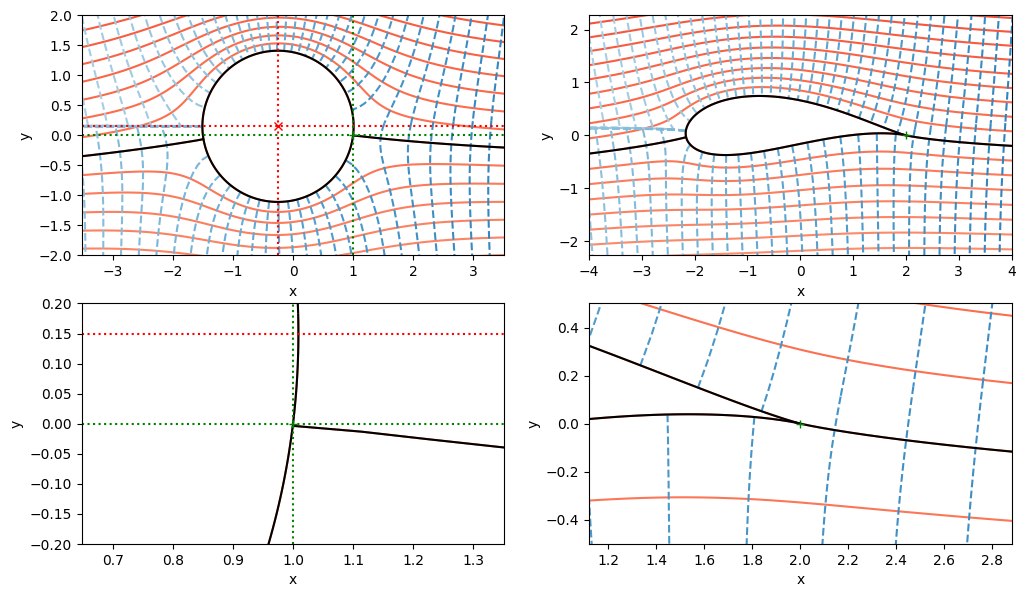

In [9]:
# contour of the cylinder 
psi0 = 0. 

fig,axs = plt.subplots(2,2,figsize=(12,7))
axs[0,0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
axs[0,0].contour(grid['x'],grid['y'],ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[0,0].contour(grid['x'],grid['y'],ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[0,0].contour(grid['x'],grid['y'],ecoul['psi'],[psi0,],colors='black')
axs[1,0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
axs[1,0].contour(grid['x'],grid['y'],ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[1,0].contour(grid['x'],grid['y'],ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[1,0].contour(grid['x'],grid['y'],ecoul['psi'],[psi0,],colors='black')

# axs[1].plot([-np.pi,np.pi],[0,0],color='grey')
axs[0,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[0,1].contour(zgrid.real,zgrid.imag,ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[0,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[psi0,],colors='black')
axs[1,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[1,1].contour(zgrid.real,zgrid.imag,ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[1,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[psi0,],colors='black')

axs[0,0].plot(ZTE.real,ZTE.imag,'+',color='green')
axs[0,1].plot(LocTE.real,LocTE.imag,'+',color='green')
axs[1,0].plot(ZTE.real,ZTE.imag,'+',color='green')
axs[1,1].plot(LocTE.real,LocTE.imag,'+',color='green')

for ax in axs[:,0]:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-2,2)    
    ax.set_ylim(-2,2)
    ax.axvline(Zcenter.real,color='red',linestyle='dotted')
    ax.axhline(Zcenter.imag,color='red',linestyle='dotted')
    ax.axvline(ZTE.real,color='green',linestyle='dotted')
    ax.axhline(ZTE.imag,color='green',linestyle='dotted')
for ax in axs[:,1]:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4,4)    
    ax.set_ylim(-1,1)
axs[1,0].set_xlim(0.8,1.2)    
axs[1,0].set_ylim(-0.2,0.2)
axs[1,1].set_xlim(1.8,2.2)    
axs[1,1].set_ylim(-0.5,0.5)
plt.show()

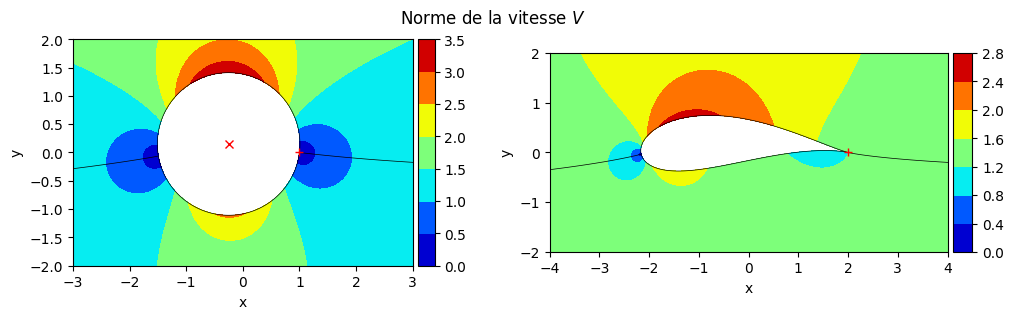

In [10]:
fig,axs = plt.subplots(1,2,figsize=(12,3))
axs[0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
cf = axs[0].contourf(grid['x'],grid['y'],ecoul['V'],cmap=plt.cm.jet)
axs[0].contour(grid['x'],grid['y'],ecoul['psi'],[psi0,],colors='black',
               linewidths=0.5)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf, cax=cax)

cf2 = axs[1].contourf(zgrid.real,zgrid.imag,w_prof,linestyles='--',cmap=plt.cm.jet)
axs[1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[psi0,],colors='black',
               linewidths=0.5)
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf2, cax=cax2)

axs[0].plot(ZTE.real,ZTE.imag,'+',color='red')
axs[1].plot(LocTE.real,LocTE.imag,'+',color='red')

for ax in axs:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
axs[0].set_xlim(-3,3)
axs[0].set_ylim(-2,2)
axs[1].set_ylim(-2,2)
axs[1].set_xlim(-4,4)
plt.suptitle(r'Norme de la vitesse $V$')
plt.show()

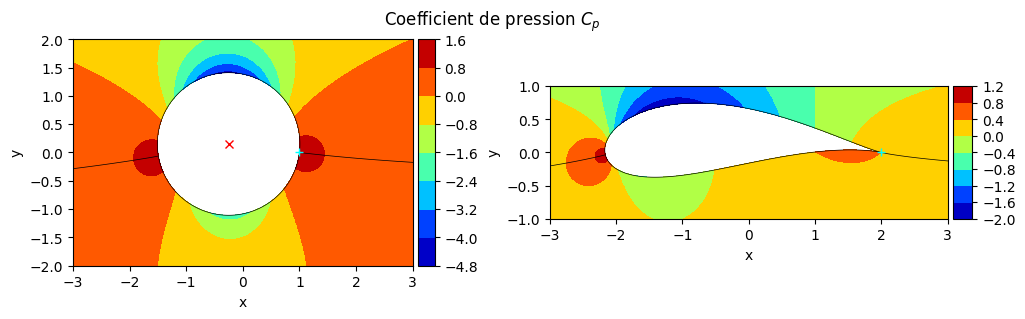

In [11]:
fig,axs = plt.subplots(1,2,figsize=(12,3))
axs[0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
cf = axs[0].contourf(grid['x'],grid['y'],ecoul['Cp'],cmap=plt.cm.jet)
axs[0].contour(grid['x'],grid['y'],ecoul['psi'],[psi0,],colors='black',linewidths=0.5)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf, cax=cax)

cf2 = axs[1].contourf(zgrid.real,zgrid.imag,Cp_prof,linestyles='--',cmap=plt.cm.jet)
axs[1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[psi0,],colors='black',linewidths=0.5)
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf2, cax=cax2)

axs[0].plot(ZTE.real,ZTE.imag,'+',color='cyan')
axs[1].plot(LocTE.real,LocTE.imag,'+',color='cyan')

for ax in axs:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-3,3)
axs[0].set_ylim(-2,2)
axs[1].set_ylim(-1,1)
plt.suptitle(r'Coefficient de pression $C_p$')
plt.show()

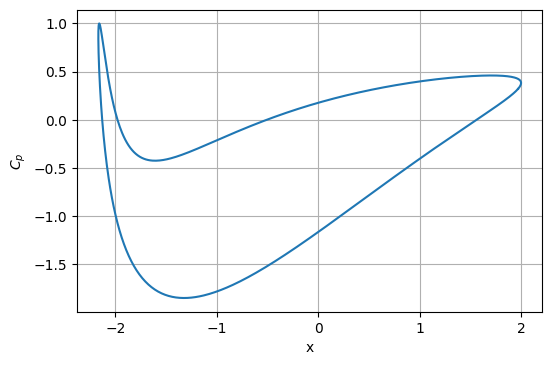

In [12]:
plt.plot(Prof.real[:-1],Cp_cercle_prof[:-1]) #,marker='o')
# plt.ylim(-2.0,1.2)
plt.xlabel(r'x')
plt.ylabel(r'$C_p$')
plt.grid()
plt.show()